# NetworkX : librairie pour manipuler et analyser les graphes

On va découvrir NetworkX qui considère les graphes comme des objets. La documentation est [ici](https://networkx.org/documentation/stable/reference/index.html).

On commence par charger la librairie NetworkX.

In [1]:
import networkx as nx

## 1. Intro à NetworkX

### 1.1 Créer un graphe vide.

On peut maintenant créer un graphe vide via le contructeur ```Graph()```

In [2]:
G = nx.Graph()

In [3]:
G

In [4]:
print(G)

Graph with 0 nodes and 0 edges


In [5]:
G.nodes()

NodeView(())

### 1.2 Sommets

On peut ajouter des sommets un par un via ```add_node(v)```

In [6]:
G.add_node(1)
G.nodes()

NodeView((1,))

On peut aussi ajouter plusieurs sommets à la fois via des listes.

In [7]:
G.add_nodes_from([2,3])
G.nodes()

NodeView((1, 2, 3))

On peut enfin ajouter des sommets ainsi que des attributs aux sommets via une des listes de couples ```(sommet, dictionnaire d'attributs)```

In [8]:
G.add_nodes_from([(4,{"color":"red"}), (5,{"color":"green", "weight":12})])
G.nodes()

NodeView((1, 2, 3, 4, 5))

Si on veut accéder aux attributs des sommets on utilise ```G.nodes.data```

In [9]:
G.nodes.data()

NodeDataView({1: {}, 2: {}, 3: {}, 4: {'color': 'red'}, 5: {'color': 'green', 'weight': 12}})

Les sommets d'un graphe peuvent être ajoutés aux sommets d'un autre.

In [10]:
H = nx.path_graph(10)
G.add_nodes_from(H.nodes())

Attention, si les sommets de ```G``` ont le même nom que les sommets de ```H```. On fait alors l'union.

Comme les sommets peuvent être n'importe quoi, on peut aussi ajouter ```H``` lui-même comme un sommet de ```G```.

In [11]:
G.add_node(H)

In [12]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 0, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x000001FE0B8FB710>))

In [13]:
G.nodes.data()

NodeDataView({1: {}, 2: {}, 3: {}, 4: {'color': 'red'}, 5: {'color': 'green', 'weight': 12}, 0: {}, 6: {}, 7: {}, 8: {}, 9: {}, <networkx.classes.graph.Graph object at 0x000001FE0B8FB710>: {}})

### 1.3 Arêtes

On peut aussi créer un graphe en ajoutant des arêtes directement.

In [14]:
G = nx.Graph()
G.add_edge(1,2)

In [15]:
G.edges()

EdgeView([(1, 2)])

Par liste d'arêtes...

In [16]:
G.add_edges_from([(2,3),('a',8)])

In [17]:
G.nodes()

NodeView((1, 2, 3, 'a', 8))

Une arête est un couple ou un triplet (auquel cas, le troisième élément du triplet est un dictionnaire d'attibuts associés à l'arête)

In [18]:
G.add_edges_from([(2, 3, {'weight': 3.1415})])

Pour "nettoyer" un graphe, on invoque ```G.clear()```. Alors ```G``` ne contient plus ni sommet ni arête.

In [19]:
G.clear()
print(G)

Graph with 0 nodes and 0 edges


### 1.4 Observer les caractéristiques d'un graphe

On a accès à quatre propriétés d'un graphe pour l'étudier : ```G.nodes```, ```G.edges```, ```G.degree``` et ```G.adj```.

In [20]:
G = nx.cycle_graph(7)

In [21]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6))

In [22]:
G.edges

EdgeView([(0, 1), (0, 6), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6)])

In [23]:
G.degree

DegreeView({0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2})

In [24]:
G.adj

AdjacencyView({0: {1: {}, 6: {}}, 1: {0: {}, 2: {}}, 2: {1: {}, 3: {}}, 3: {2: {}, 4: {}}, 4: {3: {}, 5: {}}, 5: {4: {}, 6: {}}, 6: {5: {}, 0: {}}})

On peut les consulter simplement, les transformer en liste, set, dict ou tuples.

In [25]:
list(G.nodes)

[0, 1, 2, 3, 4, 5, 6]

In [26]:
set(G.edges)

{(0, 1), (0, 6), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6)}

In [27]:
dict(G.degree)

{0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2}

In [28]:
dict(G.adj)

{0: AtlasView({1: {}, 6: {}}),
 1: AtlasView({0: {}, 2: {}}),
 2: AtlasView({1: {}, 3: {}}),
 3: AtlasView({2: {}, 4: {}}),
 4: AtlasView({3: {}, 5: {}}),
 5: AtlasView({4: {}, 6: {}}),
 6: AtlasView({5: {}, 0: {}})}

### 1.5 Lire un graphe

NetworkX comprend plusieurs types de format de graphes qui peuvent être stockés dans des fichiers. Voir [ici](https://networkx.org/documentation/stable/reference/readwrite/index.html) pour les détails.

### 1.6 Utiliser les constructeurs déjà dans NetworkX

Les grandes familles de graphe sont facilement accessibles.

In [29]:
P = nx.petersen_graph()
P.nodes(), P.edges

(NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9)),
 EdgeView([(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)]))

In [30]:
C = nx.cycle_graph(10)
C.nodes(), C.edges()

(NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9)),
 EdgeView([(0, 1), (0, 9), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]))

In [31]:
G = nx.erdos_renyi_graph(20,0.7)
G.edges()

EdgeView([(0, 1), (0, 3), (0, 4), (0, 5), (0, 6), (0, 8), (0, 9), (0, 10), (0, 12), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (1, 2), (1, 3), (1, 4), (1, 6), (1, 7), (1, 9), (1, 10), (1, 12), (1, 13), (1, 14), (1, 15), (1, 18), (1, 19), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 12), (2, 13), (2, 14), (2, 16), (2, 17), (2, 18), (3, 4), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 16), (3, 17), (3, 19), (4, 7), (4, 8), (4, 9), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 6), (5, 7), (5, 8), (5, 9), (5, 11), (5, 12), (5, 13), (5, 14), (5, 16), (5, 17), (5, 18), (5, 19), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 17), (6, 18), (6, 19), (7, 8), (7, 9), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 18), (7, 19), (8, 10), (8, 12), (8, 13), (8, 14), (8, 16), (8, 18), (8, 19), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (9, 17), (9, 18), (9, 19), (10, 11), (10, 12), (10, 

### 1.7 Analyse du graphe

Observez le comportement des fonctions suivantes.

In [32]:
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,3), (4,5)])

In [33]:
list(nx.connected_components(G))

[{1, 2, 3}, {4, 5}]

In [34]:
sorted([d for n,d in G.degree])

[1, 1, 2, 2, 2]

In [35]:
nx.clustering(G)

{1: 1.0, 2: 1.0, 3: 1.0, 4: 0, 5: 0}

### 1.8 Représentation des graphes

Même si NetworkX n'est pas destiné à la représentation des graphes (voir plutôt GraphViz ou Gephi ou autres logiciels). Il est possible de représenter les graphes manipulés.

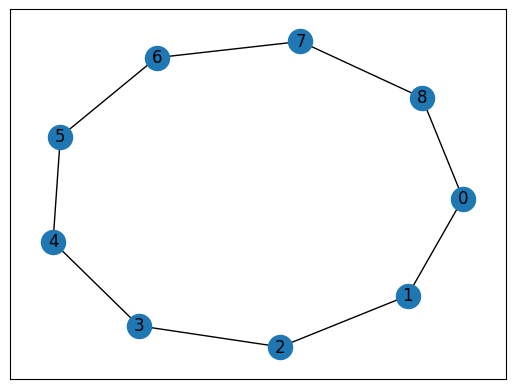

In [37]:
G = nx.cycle_graph(9)
nx.draw_networkx(G)

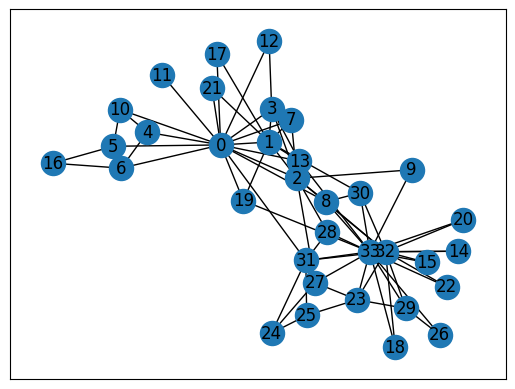

In [38]:
G = nx.karate_club_graph()
nx.draw_networkx(G)

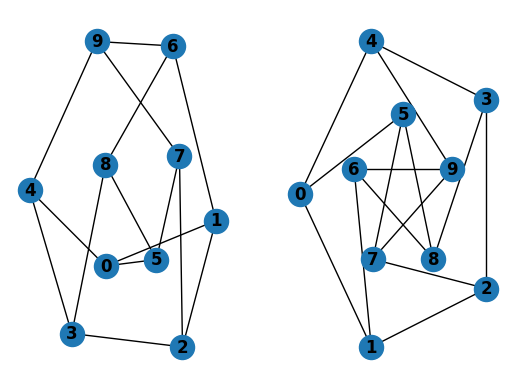

In [39]:
import matplotlib.pyplot as plt

G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

## 2. Cinéphilie

Nous allons étudier le graphe des acteurs d'Hollywood. Regardez à quoi ressemble le fichier ```movies.txt```. Chaque ligne est le titre d'un film suivi des acteurs qui y jouent. Chargez le graphe à l'aide de la commande ```nx.read_adjlist(...,...)```.

In [71]:
M = nx.read_adjlist("movies2.txt", delimiter = "/")

In [68]:
len(M.nodes), len(M.edges)

(79, 77)

Les grands graphes de la vraie vie sont souvent remplis de petites composantes connexes et d'une unique géante. On veut garder la géante.

In [69]:
M.nodes()

NodeView(("'Breaker' Morant (1980)", 'Brown, Bryan (I)', 'Henderson, Dick (II)', 'Gray, Ian (I)', 'Woodward, Edward', 'Thompson, Jack (I)', 'Procanin, Michael', 'Bernard, Hank', 'Nicholls, Jon', 'Knez, Bruno', 'Steele, Rob (I)', 'Lovett, Alan', 'Mullinar, Rod', 'Ball, Ray (I)', 'Rodger, Ron', 'Mann, Trevor (I)', 'Smith, Chris (I)', 'Cisse, Halifa', 'Cassell, Alan (I)', 'Osborn, Peter', 'Pfitzner, John', 'Waters, John (III)', "Tingwell, Charles 'Bud'", 'Kiefel, Russell', 'Ball, Vincent (I)', 'Donovan, Terence (I)', 'Fitz-Gerald, Lewis', 'Currer, Norman', 'Meagher, Ray', 'Wilson, Frank (II)', 'Bell, Wayne (I)', 'Haywood, Chris (I)', 'Quin, Don', 'Peterson, Ron', 'Seidel, Nellie', 'West, Barbara', 'Reed, Maria', 'Horseman, Sylvia', 'Dick, Judy', 'Radford, Elspeth', 'Walton, Laurie (I)', 'Cornish, Bridget', 'Erskine, Ria', "'burbs', The (1989)", 'Jayne, Billy', 'Howard, Rance', 'Ducommun, Rick', 'Drier, Moosie', 'Dern, Bruce', 'Kramer, Jeffrey (I)', 'Gordon, Gale', 'Theodore, Brother', 'Ha

In [62]:
largest_cc = max(nx.connected_components(M), key=len)
Mlarge = M.subgraph(largest_cc)
Mlarge.number_of_nodes(),Mlarge.number_of_edges()

(43, 42)

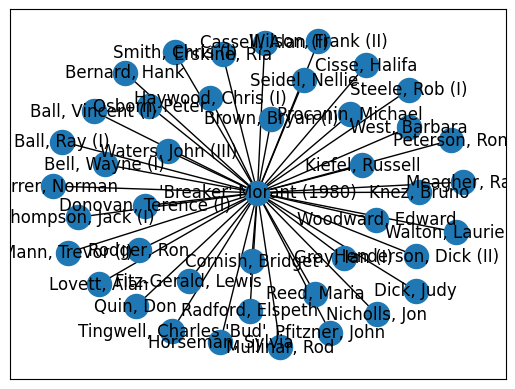

In [72]:
nx.draw_networkx(Mlarge)

Le [Bacon Number](https://en.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon#Bacon_numbers) d'un acteur (inspiré par le [Erdős number](https://en.wikipedia.org/wiki/Erd%C5%91s_number) pour les mathématiciens) est défini comme suit :
* Kevin Bacon a le nombre 0,
* Étant donné un acteur, son Bacon number est le plus petit Bacon number de ses co-acteurs augmenté de 1.

Kevin Bacon a été choisi en raison de sa filmographie conséquente. Il fait effectivement partie de notre composante géante du graphe de tournages.

### À vous de jouer 

_Écrire une fonction qui prend un nom d'acteur en argument et renvoie son Bacon number._

In [ ]:
def bacon_number(actor) :
    return 

On se fiche un peu des films en commun. 

_Comment restreindre le graphe uniquement aux acteurs (une arête si deux acteurs on joué dans un film en commun)?_

In [ ]:
# Votre code

_Rédiger une fonction alternative qui renvoie le Bacon number en explorant ce nouveau graphe._

In [ ]:
# Votre code

_Quel est le Bacon number moyen des acteurs du graphe ?_

On se demande pourquoi on a choisi Kevin Bacon comme point de référence. 

_Afficher l'histogramme des degrés du graphes pour déterminer qui sont les acteurs ayant co-joué avec le plus de monde._

_Écrire une fonction qui renvoie le 'Actor' number moyen pour un 'Actor' donné._

_Quel est l'acteur de plus gros degré dans le graphe ?_

_Lister les 10 premiers acteurs en terme de degré._

_Représenter le diagramme des co-starring vs nb de films._

_Donner un bon candidat pour le prochain Bacon number._